In [9]:
import pandas as pd
pd.set_option('display.max_columns', 50)
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from adjustText import adjust_text

In [2]:
df = pd.read_excel('SLC33A1_dipeptides.xlsx')
names = [n.lower() for n in df['Name'].values]
names = [n[0].upper()+n[1:4]+n[4].upper()+n[5:7] for n in names]
df.loc[:, 'Name'] = names
df = df.groupby('Name').mean().reset_index()

In [3]:
dp_masses = pd.read_excel('dipeptide_masses.xlsx')
dp_masses['MW_round'] = dp_masses.loc[:, 'MW'].round(2)

mass2names = {}
for name, mass in zip(dp_masses.loc[:,'Name'], dp_masses.loc[:,'MW_round']):
    if mass in mass2names:
        mass2names[mass].append(name)
    else:
        mass2names[mass] = [name]

mass2label = {}
for k in mass2names.keys():
    ns = ''.join(mass2names[k])
    if 2*ns.count('E') >= len(ns):
        mass2label[k] = (0, 'Only Glu')
    elif ns.count('E') > 0:
        mass2label[k] = (1, 'Glu+others')
    else:
        mass2label[k] = (2, 'Only others')

In [4]:
df['MW_round'] = df.loc[:, 'Molecular Weight'].round(2)
df['categories'] = [mass2label[mw][0] for mw in df['MW_round']]
df['label'] = [mass2label[mw][1] for mw in df['MW_round']]

categories = df['categories'].values
colormap = np.array(['r', 'g', 'b'])

In [5]:
area_WT = df['Group Area: Sample, intracellular, Vehicle, WT'].values
area_KO = df['Group Area: Sample, intracellular, Vehicle, KO'].values
area_WT_dox = df['Group Area: Sample, intracellular, Dox, WT'].values
area_KO_dox = df['Group Area: Sample, intracellular, Dox, KO'].values
pval = df['P-value: (Sample, intracellular, Vehicle, KO) / (Sample, intracellular, Vehicle, WT)'].values
name = df['Name'].values

In [6]:
log2diff_WT_KO = np.log2(area_KO) - np.log2(area_WT)
log2diff_WT_KO_dox = np.log2(area_KO_dox) - np.log2(area_WT_dox)
log2diff_KO_dox = np.log2(area_KO_dox) - np.log2(area_KO)
log2diff_WT_dox = np.log2(area_WT_dox) - np.log2(area_WT)

max_diff = max([max(el) for el in [log2diff_WT_KO, log2diff_WT_KO_dox, log2diff_KO_dox, log2diff_WT_dox]])

<Figure size 432x288 with 0 Axes>

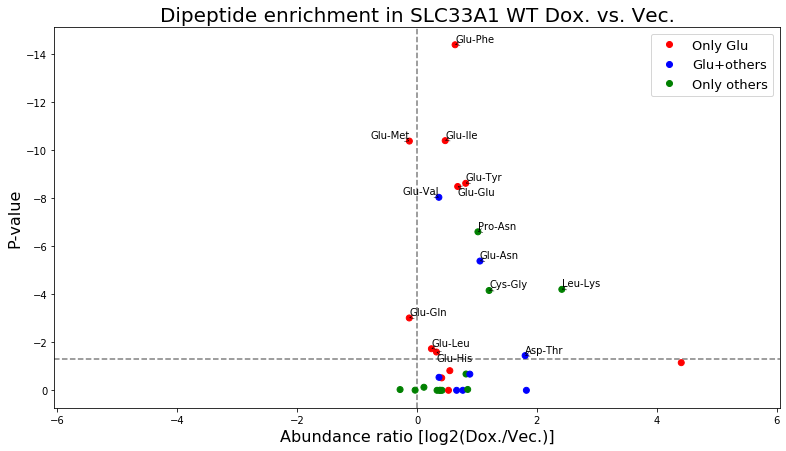

In [10]:
# x = log2diff_WT_KO
# x = log2diff_WT_KO_dox
# x = log2diff_KO_dox
x = log2diff_WT_dox
y = np.log10(pval)
classes = ['Only Glu', 'Glu+others', 'Only others']
values = df['categories'].values
colours = ListedColormap(['r','b','g'])

fig1 = plt.figure()
plt.figure(figsize=(13,7))
volcano = plt.scatter(x, y,c=values, cmap=colours)
# plt.title('Dipeptide enrichment SLC33A1 WT vs. KO', size=20)
# plt.xlabel('Abundance ratio [log2(KO/WT)]', size=16)
# plt.title('Dipeptide enrichment SLC33A1 WT vs. KO (both +dox)', size=20)
# plt.xlabel('Abundance ratio [log2(KO/WT)]', size=16)
# plt.title('Dipeptide enrichment in SLC33A1 KO Dox. vs. Vec.', size=20)
# plt.xlabel('Abundance ratio [log2(Dox./Vec.)]', size=16)
plt.title('Dipeptide enrichment in SLC33A1 WT Dox. vs. Vec.', size=20)
plt.xlabel('Abundance ratio [log2(Dox./Vec.)]', size=16)

#plt.xlabel('Abundance ratio [log2(KO/WT)]', size=16)
plt.xlim([-max_diff*1.1, max_diff*1.1])
plt.ylabel('P-value', size=16)
plt.gca().invert_yaxis()

#plt.axhspan(-2, -15, xmax=0.9, facecolor='0.2', alpha=0.5, zorder=-100)
#plt.axvspan(-2, 0, facecolor='0.2', alpha=0.5, zorder=-100)


plt.legend(handles=volcano.legend_elements()[0], labels=classes, fontsize=13)

plt.axvline(0, linestyle='dashed', linewidth=1.5, color='gray', zorder=-100)
plt.axhline(np.log10(0.05), linestyle='dashed', linewidth=1.5, color='gray', zorder=-100)


#plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)
#plt.gca().spines['top'].set_visible(False)

texts = []
for i, txt in enumerate(name):
    if y[i] < np.log10(0.05):
        #plt.annotate(txt, (x[i]+0.1, y[i]+0.1))
        texts.append(plt.text(x[i], y[i], txt))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='black', lw=0.5))


# plt.savefig('SLC33A1_WTvsKO_dipeptide_volcano.pdf')
# plt.savefig('SLC33A1_WTvsKO_dox_dipeptide_volcano.pdf')
# plt.savefig('SLC33A1_KO_Dox_vs_Vec_dipeptide_volcano.pdf')
plt.savefig('SLC33A1_WT_Dox_vs_Vec_dipeptide_volcano.pdf')

plt.show();